1.Read csv

In [21]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Aichuk Debbarma\Desktop\DATAsummer\IrisFlowerDetection\iris.csv')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


2. EDA [EXPLORATORY DATA ANALYSIS]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

2.1) PAIR PLOT

<Figure size 1000x800 with 0 Axes>

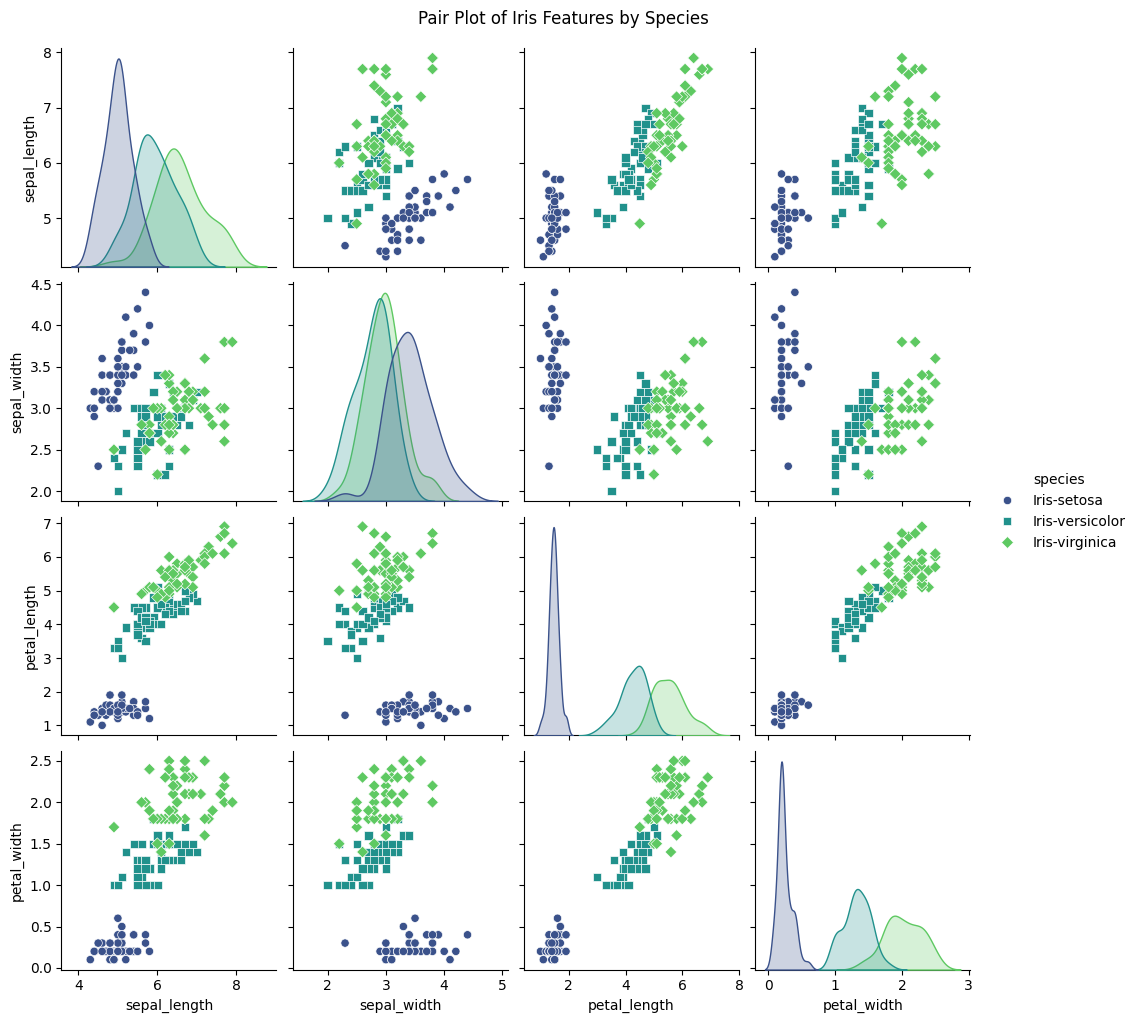

In [8]:
plt.figure(figsize=(10, 8)) 
sns.pairplot(data, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) 
plt.show()

2.2 BOX PLOT

C:\Users\Aichuk Debbarma\AppData\Local\Temp\ipykernel_536268\1720599448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=data, palette='coolwarm')
C:\Users\Aichuk Debbarma\AppData\Local\Temp\ipykernel_536268\1720599448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_width', data=data, palette='coolwarm')
C:\Users\Aichuk Debbarma\AppData\Local\Temp\ipykernel_536268\1720599448.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=data, palette='

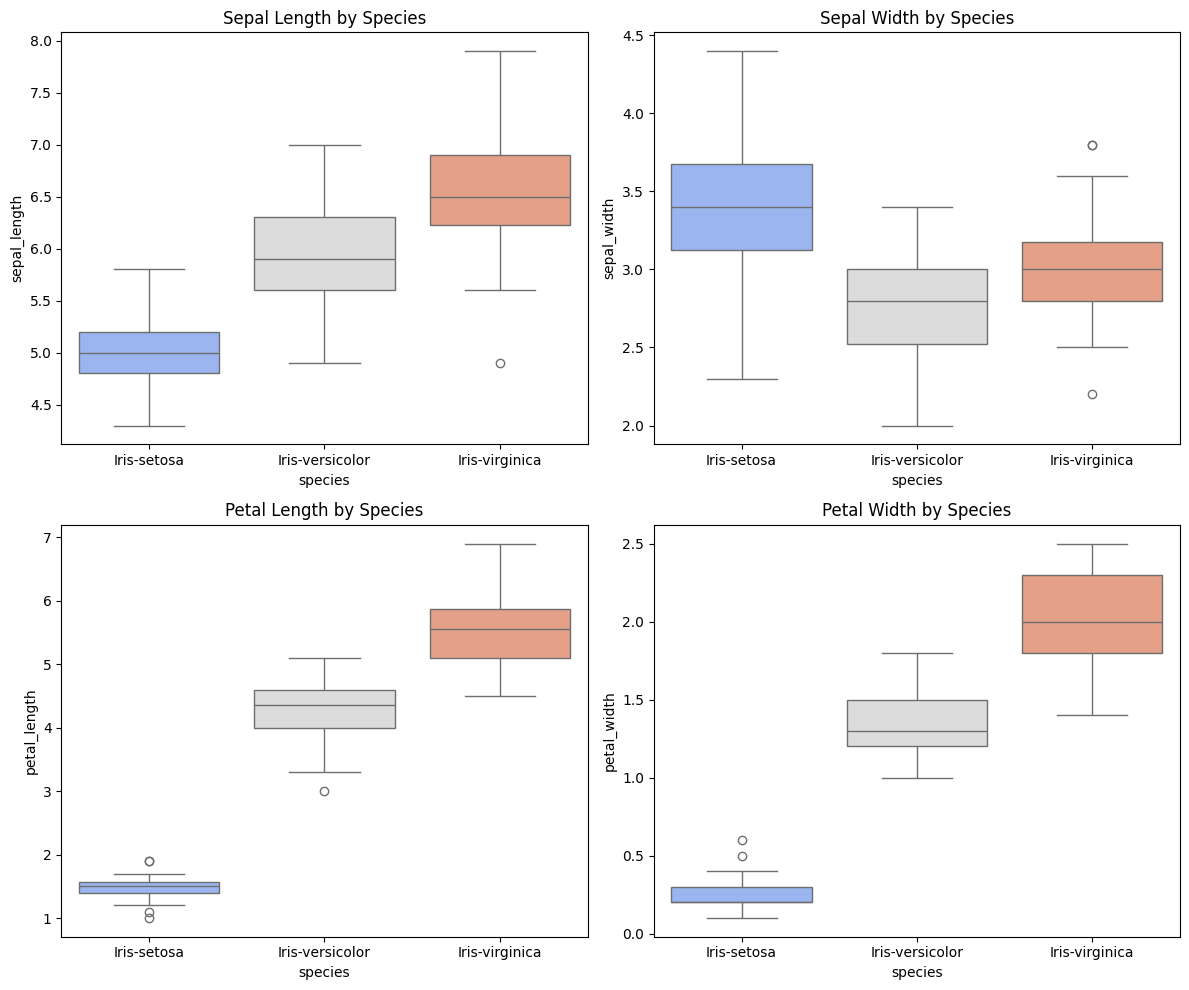

In [9]:
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability

plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal_length', data=data, palette='coolwarm')
plt.title('Sepal Length by Species')

plt.subplot(2,2,2) 
sns.boxplot(x='species', y='sepal_width', data=data, palette='coolwarm')
plt.title('Sepal Width by Species')

plt.subplot(2,2,3) 
sns.boxplot(x='species', y='petal_length', data=data, palette='coolwarm')
plt.title('Petal Length by Species')

plt.subplot(2,2,4) 
sns.boxplot(x='species', y='petal_width', data=data, palette='coolwarm')
plt.title('Petal Width by Species')

plt.tight_layout() 
plt.show()

2.3 CORRELATION HEATMAP

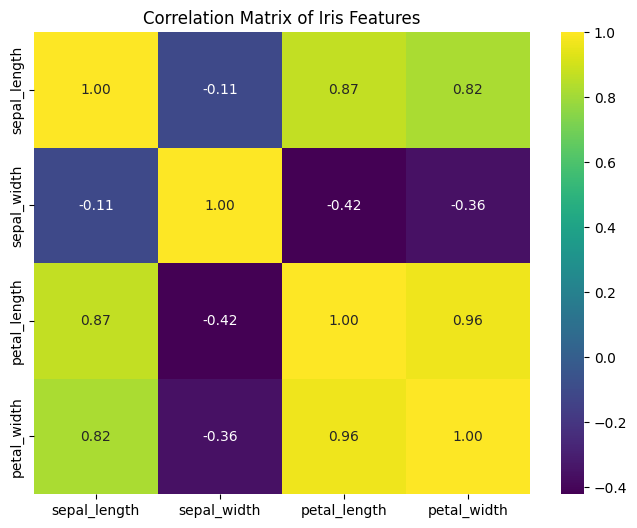

In [10]:
plt.figure(figsize=(8, 6))
# Selection of  only numerical columns for calculation of correlation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()

3 PREPROCESSING FOR ML

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


3.1 initialising features and target

In [12]:
X = data.drop('species', axis=1) # axis=1 means drop a column
y = data['species']
print("\nFeatures (X) - first 5 rows:")
print(X.head())
print("\nTarget (y) - first 5 rows:")
print(y.head())


Features (X) - first 5 rows:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Target (y) - first 5 rows:
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


3.2 ENCODE TARGET VARIABLE

In [13]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nOriginal Species Names: {le.classes_}") 
print(f"Encoded Target (y_encoded) - first 5 values: {y_encoded[:5]}")


Original Species Names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded Target (y_encoded) - first 5 values: [0 0 0 0 0]


3.3 SPLIT THE DATA

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

print(f"\nTraining set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")


Training set shape: X_train (105, 4), y_train (105,)
Testing set shape: X_test (45, 4), y_test (45,)


4 TRAINING AND EVALUATION

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- Model Training and Evaluation ---")



--- Model Training and Evaluation ---


4.1 DICTIONARY TO STORE DIFFERENT MODELS

In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42), # max_iter for convergence
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVC)": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5) # n_neighbors is a key hyperparameter
}
results = {}


Training Logistic Regression...
Logistic Regression - Accuracy: 0.9333
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


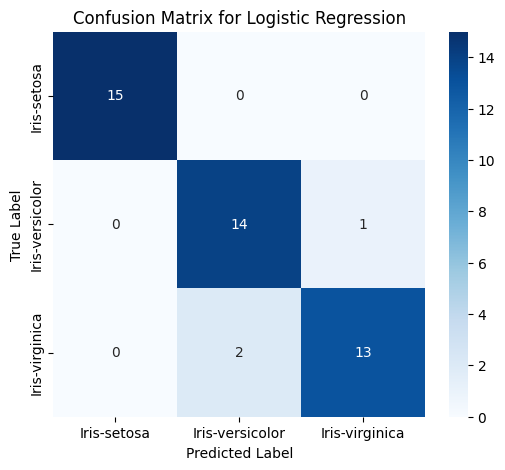


Training Decision Tree Classifier...
Decision Tree Classifier - Accuracy: 0.9333
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


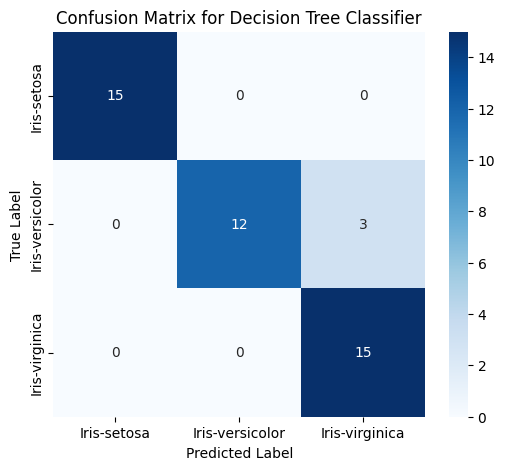


Training Random Forest Classifier...
Random Forest Classifier - Accuracy: 0.8889
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


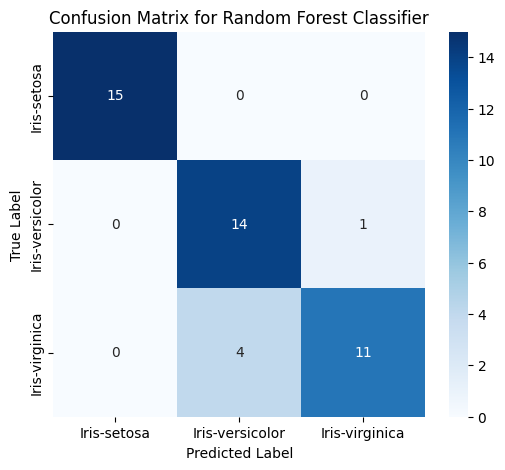


Training Support Vector Machine (SVC)...
Support Vector Machine (SVC) - Accuracy: 0.9556
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


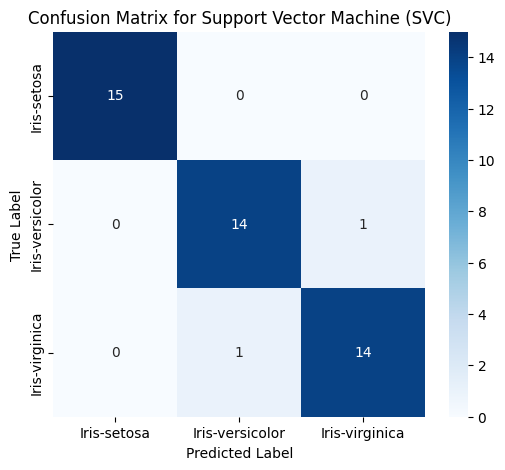


Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9778
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


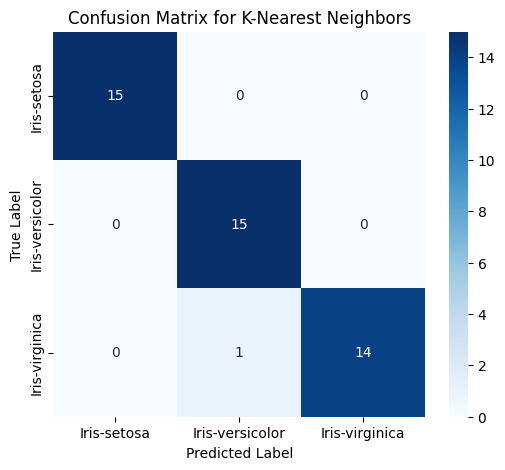


--- Model Performance Summary ---
K-Nearest Neighbors: Accuracy = 0.9778
Logistic Regression: Accuracy = 0.9333
Decision Tree Classifier: Accuracy = 0.9333
Random Forest Classifier: Accuracy = 0.8889
Support Vector Machine (SVC): Accuracy = 0.9556


In [19]:
for name, model in models.items():
     print(f"\nTraining {name}...")
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     #evaluation of accuracy
     accuracy = accuracy_score(y_test, y_pred)
     report = classification_report(y_test, y_pred, target_names=le.classes_) 
     cm = confusion_matrix(y_test, y_pred)
# Store results
     results[name] = {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": cm
    }
     print(f"{name} - Accuracy: {accuracy:.4f}")
     print(f"Classification Report:\n{report}")
     print(f"Confusion Matrix:\n{cm}")

    # Visualize Confusion Matrix for better understanding
     plt.figure(figsize=(6, 5))
     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
     plt.title(f'Confusion Matrix for {name}')
     plt.xlabel('Predicted Label')
     plt.ylabel('True Label')
     plt.show()

# Summarize all model accuracies
print("\n--- Model Performance Summary ---")
for name, res in results.items():
    print(f"{name}: Accuracy = {res['accuracy']:.4f}")

to find the specifications for setosa

In [38]:
print(data[data['species']=="Iris-setosa"].sepal_length.mean())
print(data[data['species']=="Iris-setosa"].sepal_width.mean())
print(data[data['species']=="Iris-setosa"].petal_length.mean())
print(data[data['species']=="Iris-setosa"].petal_width.mean())

5.006
3.418
1.464
0.244


to find the specifications for versicolor

In [34]:
print(data[data['species']=="Iris-versicolor"].sepal_length.mean())
print(data[data['species']=="Iris-versicolor"].sepal_width.mean())
print(data[data['species']=="Iris-versicolor"].petal_length.mean())
print(data[data['species']=="Iris-versicolor"].petal_width.mean())

5.936
2.7700000000000005
4.26
1.3259999999999998


to find the specifications for virginica

In [35]:
print(data[data['species']=="Iris-virginica"].sepal_length.mean())
print(data[data['species']=="Iris-virginica"].sepal_width.mean())
print(data[data['species']=="Iris-virginica"].petal_length.mean())
print(data[data['species']=="Iris-virginica"].petal_width.mean())

6.587999999999998
2.974
5.5520000000000005
2.0260000000000002


In [39]:
best_model_name = "K-Nearest Neighbors"
best_model = models[best_model_name]

print(f"\nUsing {best_model_name} for new predictions.")

new_flower_1 = np.array([[5.006,3.418,1.464,0.244]])
predicted_species_encoded_1 = best_model.predict(new_flower_1)
predicted_species_name_1 = le.inverse_transform(predicted_species_encoded_1)

print(f"\nNew Flower 1 measurements: {new_flower_1[0]}")
print(f"Predicted Species: {predicted_species_name_1[0]}")

new_flower_2 = np.array([[5.936,2.7700000000000005,4.26,1.3259999999999998]])
predicted_species_encoded_2 = best_model.predict(new_flower_2)
predicted_species_name_2 = le.inverse_transform(predicted_species_encoded_2)

print(f"\nNew Flower 2 measurements: {new_flower_2[0]}")
print(f"Predicted Species: {predicted_species_name_2[0]}")

new_flower_3 = np.array([[6.587999999999998,2.974,5.5520000000000005,2.0260000000000002]])
predicted_species_encoded_3 = best_model.predict(new_flower_3)
predicted_species_name_3 = le.inverse_transform(predicted_species_encoded_3)

print(f"\nNew Flower 3 measurements: {new_flower_3[0]}")
print(f"Predicted Species: {predicted_species_name_3[0]}")


Using K-Nearest Neighbors for new predictions.

New Flower 1 measurements: [5.006 3.418 1.464 0.244]
Predicted Species: Iris-setosa

New Flower 2 measurements: [5.936 2.77  4.26  1.326]
Predicted Species: Iris-versicolor

New Flower 3 measurements: [6.588 2.974 5.552 2.026]
Predicted Species: Iris-virginica


C:\Users\Aichuk Debbarma\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Aichuk Debbarma\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Aichuk Debbarma\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
